# Exercises

#### Tips Dataset

Create either a python script or a jupyter notebook named `explore_tips` that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.
You can load the data set like this:
```python
import seaborn as sns

sns.load_dataset('tips')```

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('figure', figsize=(13, 7))

plt.rc('font', size=14)

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### T-Test

Is the mean tip higher at dinner time opposed to lunch time?

In [9]:
# 2 sample
dinner_sample = tips[tips.time == 'Dinner'].tip
lunch_sample = tips[tips.time == 'Lunch'].tip

Text(0.5, 1.0, 'Mean Tip for Lunch Time')

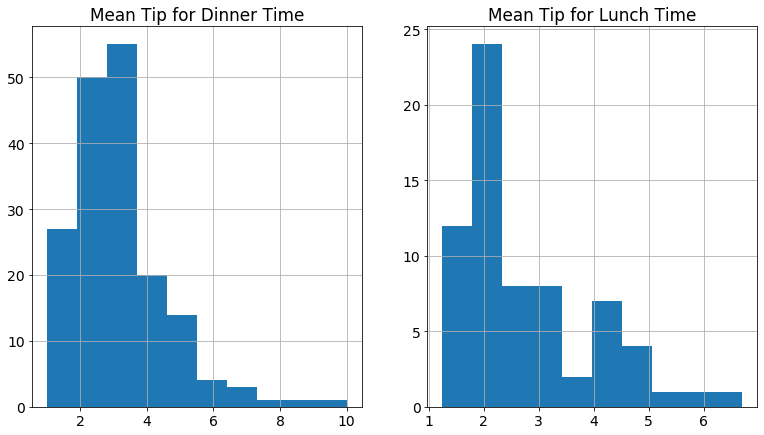

In [13]:
plt.subplot(121)
dinner_sample.hist()
plt.title('Mean Tip for Dinner Time')

plt.subplot(122)
lunch_sample.hist()
plt.title('Mean Tip for Lunch Time')

*both samples have a right skew*

**Hypotheses**:

$H_0$: mean tip dinner <= mean tip lunch 

$H_a$: mean tip dinner > mean tip lunch

In [34]:
null = 'mean tip dinner <= mean tip lunch'

# Significance Level
alpha = .05

# Check Variance (levene test)
stats.levene(dinner_sample, lunch_sample)

LeveneResult(statistic=0.88098601335503, pvalue=0.3488676006910484)

P-value > alpha, so we fail to reject that they are **equal variances**

In [18]:
# Test
t, p = stats.ttest_ind(dinner_sample, lunch_sample, equal_var=True)
t, p

(1.9062569301202392, 0.05780153475171558)

In [19]:
# Decide
if p/2 > alpha:
    print("We fail to reject", null)
elif t < 0:
    print("We fail to reject", null)
else:
    print("We reject", null)

We reject mean tip dinner <= mean tip lunch


**Conclusion: The average tip at dinner time is greater than the average tip at lunch time**

### Chi$^2$ Test

Is the dine-in time independent of the day?

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

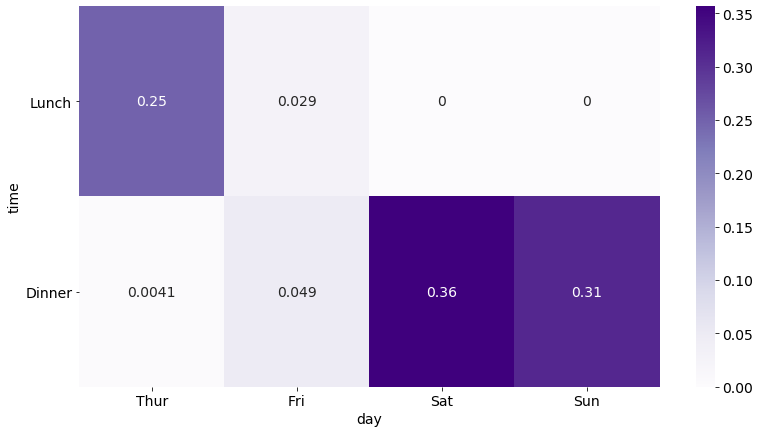

In [33]:
observed = pd.crosstab(tips.time, tips.day, normalize=True)
sns.heatmap(observed, annot=True, cmap="Purples")
plt.yticks(rotation=0)

- there seems to be a dependence between time of dine-in and day of the week
- Lunch on weekdays
- Dinner on weekends

**Hypotheses**:

$H_0$: Time of day and Day of the week are independent

$H_a$: Time of day and Day of the week are dependent

In [42]:
null = 'Time of day and Day of the week are independent'

# Significance Level
alpha = .05

# Test
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Chi_2: ', chi2, '\n',
      'P-value: ',  p, '\n',
      'Degrees of Freedom: ',  degf, '\n',
      'Expected: ',  expected)

Chi_2:  0.8898060362437923 
 P-value:  0.8278871245504043 
 Degrees of Freedom:  3 
 Expected:  [[0.0708143  0.02170116 0.09936845 0.08680462]
 [0.18328406 0.0561677  0.25718893 0.22467079]]


In [41]:
# Decide
if p < alpha:
    print("We reject the hypothesis that", null)
else:
    print("We fail to reject the null hypothesis that", null)

We fail to reject the null hypothesis that Time of day and Day of the week are independent


**Conclusion: Time and Day are independent of each other**